# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

C:\Users\amras\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load Data

In [3]:
data = load_wine()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Preprocessing

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [8]:
x = data.data
y = data.target

In [9]:
# use Principal Component Analysis
# convert decomposition to 2
pca = PCA(n_components=5)

In [10]:
x = pca.fit_transform(x)

In [11]:
# scale data with Standard Scaler
sc = StandardScaler()

In [12]:
x = sc.fit_transform(x)

In [13]:
x[0:10]

array([[ 1.01428247,  1.64083119,  1.02194385, -0.11226888,  0.61251061],
       [ 0.9650412 , -0.40957298,  2.2271305 , -0.38784038, -0.43974084],
       [ 1.39475632, -0.49909529, -0.3633816 ,  0.40955494,  0.3443517 ],
       [ 2.33458583,  0.01471403, -0.2994138 , -0.24295187,  0.77677844],
       [-0.03684263,  1.41163108, -0.18097612,  0.61086716,  0.25007951],
       [ 2.23903942, -0.02535888,  0.30989795, -0.16159089,  0.14187174],
       [ 1.72878392, -1.03211461,  0.69428308,  0.02494205, -0.43753686],
       [ 1.74607355,  0.87411462,  0.01321766,  0.60573105, -0.77128599],
       [ 0.94892874, -0.62451966,  1.2668396 , -0.4087615 ,  0.28178473],
       [ 0.94896914, -0.54217208,  0.50871568, -0.75277599,  1.40980224]])

# Convert Data To Train And Test 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.33)

## Create Model

In [15]:
model = KNeighborsClassifier()

## Fit Model

In [16]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Predict

In [17]:
y_pred = model.predict(x_test)

## Confusion Matrix And Classifiction Report

In [18]:
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))
print()
print("Classifiction Report :")
print()
print(classification_report(y_test, y_pred))



Confusion Matrix :
[[15  1  0]
 [ 1 25  0]
 [ 0  0 17]]

Classifiction Report :

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        16
          1       0.96      0.96      0.96        26
          2       1.00      1.00      1.00        17

avg / total       0.97      0.97      0.97        59



## Elbow Method

In [19]:
error = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(y_test != pred_i))


'\n\nBest Point is 3 and 4\nwe use 3 Point\n\n'

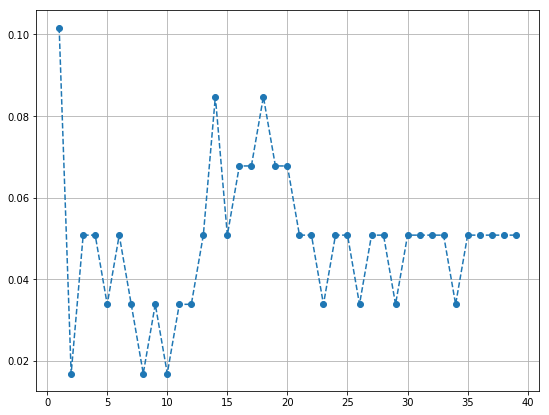

In [20]:
plt.figure(figsize=(9, 7))
plt.grid()
plt.plot(range(1,40), error, marker='o', linestyle='--')

'''

Best Point is 3 and 4
we use 3 Point

'''

## Create And Fit Model

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# Predict

In [23]:
predict = knn.predict(x_test)

## Confusion And Classifiction Report

In [24]:
print("Confusion Matrix : \n")
print(confusion_matrix(y_test, y_pred))
print()
print("Classifiction Report :\n")
print(classification_report(y_test, y_pred))

print("MSE :{0:.4f}".format(mean_squared_error(y_test, y_pred)))
print("cross val score : {}".format(cross_val_score(knn, x, y,  scoring='accuracy')))

Confusion Matrix : 

[[15  1  0]
 [ 1 25  0]
 [ 0  0 17]]

Classifiction Report :

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        16
          1       0.96      0.96      0.96        26
          2       1.00      1.00      1.00        17

avg / total       0.97      0.97      0.97        59

MSE :0.0339
cross val score : [0.81666667 0.95       0.96551724]
